For this assignment, we will work towards answering the following question: "Is there a positive correlation between Stephen Curry's prolific 3-point shooting and the number of 3-point attempts the league took as a whole?" In order to do so, we will need some useful data.

First, let us import some useful packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, let's import the following data and convert it into a dataframe.

In [2]:
d = pd.read_excel('C:\\Users\\19713\\Desktop\\Springboard\\NBA 3-Point Shooting Data (1996-2020).xlsx', index_col=0)
df = pd.DataFrame(d)

Let's take a look at what the data looks like:

In [3]:
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Yearwise Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
NaN,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
NaN,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
NaN,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
NaN,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2
NaN,Chicago Bulls,6.4,17.1,37.3,18.63,3.8,11.7,32.3,11.79,3.5,...,36.9,27.7,11.9,33.9,35.1,32.2,12.1,34.3,35.2,35.3
NaN,Cleveland Cavaliers,5.9,15.7,37.6,20.23,3.6,9.8,37.2,11.67,3.6,...,35.5,32.1,9.1,25.9,35.1,26,12.2,35.1,34.8,34.3


Let us also take a closer look as to what this table is about:

In [4]:
df.iloc[4,:].unique()

array([nan, '3PM', '3PA', '3P%', '3P% share in Total Points'],
      dtype=object)

In [5]:
df.iloc[3,:].unique()

array(['TEAMS', '1996-97', nan, '1997-98', '1998-99', '1999-00',
       '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20'], dtype=object)

From the information here, we can tell that the table consists of statistics on the number of 3-pointers made, number of 3-point attempts, 3-point percentage, and 3P% share in total points for all NBA teams from the 1996-97 season to the 2019-2020 season.

A few things of concern here: it seems as though the first three rows do not contain much information and are instead mostly full of NaN values. Let's take a closer look at these rows.

In [6]:
df.iloc[0,:].unique()

array([nan], dtype=object)

In [7]:
df.iloc[1,:].unique()

array(['Yearwise Data', nan], dtype=object)

In [8]:
df.iloc[2,:].unique()

array([nan], dtype=object)

The first three rows are unessential. Let's go ahead and get rid of these rows.

In [9]:
df = df.tail(df.shape[0]-3)

In [10]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
NaN,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
NaN,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
NaN,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
NaN,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
NaN,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2


So far so good. However, the index and the column values are not ideal. Let's first reset the index.

In [11]:
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
1,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
2,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
3,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
4,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2


And now for the columns. 

In [12]:
df = df.set_axis(range(df.shape[1]), axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
1,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
2,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
3,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
4,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2


So far so good. I also notice that row 32 might only be full of NaN values. Let's see if that's true.

In [13]:
df.iloc[32,:].unique()

array([nan], dtype=object)

Let's get rid of this row and reset the index.

In [14]:
df.drop(32, inplace = True)
df.reset_index(drop=True, inplace=True)

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,TEAMS,1996-97,NaN,NaN,NaN,1997-98,NaN,NaN,NaN,1998-99,...,NaN,NaN,2018-19,NaN,NaN,NaN,2019-20,NaN,NaN,NaN
1,NaN,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,...,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points,3PM,3PA,3P%,3P% share in Total Points
2,Atlanta Hawks,8,22.4,36,25.32,4.1,12.4,33.2,12.83,3.9,...,36,32.5,13,37,35.2,34.4,12,36.1,33.3,32.2
3,Boston Celtics,5.7,16.2,35.1,16.99,5.1,15.2,33.2,15.96,5.5,...,37.7,33.2,12.6,34.5,36.5,33.6,12.6,34.5,36.4,33.2
4,Brooklyn Nets,5.9,16.7,35.3,18.21,3.8,11.4,33.1,11.45,4.5,...,35.7,21.9,10.1,28.7,35.1,26.9,13.3,39.7,33.6,35.2
5,Chicago Bulls,6.4,17.1,37.3,18.63,3.8,11.7,32.3,11.79,3.5,...,36.9,27.7,11.9,33.9,35.1,32.2,12.1,34.3,35.2,35.3
6,Cleveland Cavaliers,5.9,15.7,37.6,20.23,3.6,9.8,37.2,11.67,3.6,...,35.5,32.1,9.1,25.9,35.1,26,12.2,35.1,34.8,34.3
7,Dallas Mavericks,5.2,16,32.6,17.22,5.1,14.4,35.7,16.74,4,...,37.2,32.5,10.3,29.1,35.5,29.6,11.2,31.8,35.1,31.4
8,Denver Nuggets,7.8,20.9,37.2,23.93,3.5,10.9,32.3,11.79,6,...,36,34.6,12.5,36.6,34,34.4,15.1,41.3,36.7,38.7
9,Detroit Pistons,7.1,18.3,38.8,22.62,3.6,11.4,31.2,11.47,5,...,37.1,31.4,11,31.4,35.1,29.8,11,30.6,35.9,29.6


Great! So far it looks pretty good. Why don't we take a look at what the names of the teams are.

In [16]:
df.iloc[:,0]

0                      TEAMS
1                        NaN
2              Atlanta Hawks
3             Boston Celtics
4              Brooklyn Nets
5              Chicago Bulls
6        Cleveland Cavaliers
7           Dallas Mavericks
8             Denver Nuggets
9            Detroit Pistons
10     Golden State Warriors
11           Houston Rockets
12            Indiana Pacers
13      Los Angeles Clippers
14        Los Angeles Lakers
15         Memphis Grizzlies
16                Miami Heat
17           Milwaukee Bucks
18    Minnesota Timberwolves
19           New York Knicks
20    Oklahoma City Thunders
21             Orlando Magic
22        Philadelphia 76ers
23              Phoenix Suns
24    Portland Trail Blazers
25          Sacramento Kings
26         San Antonio Spurs
27           Toronto Raptors
28                 Utah Jazz
29        Washington Wizards
30        Charolette Hornets
31      New Orleans Pelicans
32              NBA(Average)
Name: 0, dtype: object

Taking a look at these teams, there are two teams that are misspelled: the "Oklahoma City Thunders" and the "Charolette Hornets." Let's correct these misspellings. 

In [17]:
df.iloc[20,0] = 'Oklahoma City Thunder'
df.iloc[30,0] = 'Charlotte Hornets'
df.iloc[[20,30],0]

20    Oklahoma City Thunder
30        Charlotte Hornets
Name: 0, dtype: object

Awesome! Let us now load our next table.

In [18]:
stephen_curry = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\Stephen Curry Stats.csv')
stephen_curry

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,12,100.0,9,8,1,2,0,2,42
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,6,100.0,5,6,0,2,4,2,17
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,4,6,66.7,7,7,0,1,2,5,25
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,4,100.0,9,4,0,3,5,3,29
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0,0.0,8,14,0,7,4,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2020-2021,Regular,Fri 5/21,MEM,L,112,117,47.0,13-28,13,...,7,7,100.0,4,5,0,3,5,7,39
917,2020-2021,Regular,Wed 5/19,LAL,L,100,103,41.0,12-23,12,...,7,8,87.5,7,3,0,0,2,6,37
918,2020-2021,Regular,Thu 12/17,SAC,W,113,105,29.0,9-23,9,...,5,5,100.0,6,3,0,2,2,1,29
919,2020-2021,Regular,Tue 12/15,SAC,L,113,114,28.0,11-21,11,...,2,3,66.7,4,4,1,3,0,4,29


For what seasons do we have data for Stephen Curry's career? 

In [19]:
stephen_curry['Season_year'].unique()

array(['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020', '2020-2021'], dtype=object)

What about for the first table?

In [20]:
df.iloc[0,:].unique()

array(['TEAMS', '1996-97', nan, '1997-98', '1998-99', '1999-00',
       '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20'], dtype=object)

Since the latest season we have data on for this table is the 2019-2020 season and the latest season we have data on for Stephen Curry is the 2020-2021 season, let's ignore all the games which took place in the 2020-2021 season for Stephen Curry. In order to do that, we first will need a list of the index values for the rows which correspond to the 2020-2021 season.

In [21]:
stephen_curry_season_year = pd.DataFrame(stephen_curry['Season_year']) 
list(stephen_curry_season_year.loc[stephen_curry_season_year['Season_year'] == '2020-2021'].index)

[853,
 854,
 855,
 856,
 857,
 858,
 859,
 860,
 861,
 862,
 863,
 864,
 865,
 866,
 867,
 868,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920]

Let's now drop these rows from the stephen_curry dataframe.

In [22]:
stephen_curry.drop(list(stephen_curry_season_year.loc[stephen_curry_season_year['Season_year'] == '2020-2021'].index), inplace = True)
stephen_curry

,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,12,100.0,9,8,1,2,0,2,42
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,6,100.0,5,6,0,2,4,2,17
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,4,6,66.7,7,7,0,1,2,5,25
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,4,100.0,9,4,0,3,5,3,29
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0,0.0,8,14,0,7,4,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019-2020,Regular,Thu 10/24,LAC,L,122,141,30.0,8-20,8,...,5,5,100.0,4,4,0,1,3,8,23
849,2019-2020,Pre,Fri 10/18,LAL,W,124,103,33.0,9-20,9,...,8,8,100.0,1,6,1,0,4,2,32
850,2019-2020,Pre,Mon 10/14,LAL,L,98,104,21.0,6-17,6,...,2,2,100.0,1,3,2,2,3,3,17
851,2019-2020,Pre,Thu 10/10,MIN,W,143,123,25.0,14-19,14,...,6,6,100.0,6,6,1,2,2,5,40


Very nice! Recall what we are trying to accomplish here: we want to see if there is a positive correlation between Stephen Curry's prolific 3-point shooting and the increase in the number of 3 point attempts for the league as a whole. Given that, why don't we take a look at average number of 3-point attempts every season by Curry.

In [23]:
stephen_curry1 = stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2009-2010'].iloc[:,1].mean()
stephen_curry2 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2010-2011'].iloc[:,1].mean(), 2))
stephen_curry3 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2011-2012'].iloc[:,1].mean(), 2))
stephen_curry4 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2012-2013'].iloc[:,1].mean(), 2))
stephen_curry5 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2013-2014'].iloc[:,1].mean(), 2))
stephen_curry6 = float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == '2014-2015'].iloc[:,1].mean(), 2))
stephen_curry_keys = list(stephen_curry['Season_year'].unique())
stephen_curry_values = []
for l in list(stephen_curry['Season_year'].unique()):
    stephen_curry_values.append(float(round(stephen_curry[['Season_year', '3PTA']].loc[stephen_curry['Season_year'] == l].iloc[:,1].mean(), 1)))
stephen_curry_dict = {}
for key in stephen_curry_keys:
    for value in stephen_curry_values:
        stephen_curry_dict[key] = value
        stephen_curry_values.remove(value)
        break
stephen_curry_3pt_att = pd.DataFrame.from_dict(stephen_curry_dict, orient='index', columns = ['Avg # 3pt attempts per game'])
stephen_curry_3pt_att

,Avg # 3pt attempts per game
2009-2010,4.8
2010-2011,4.6
2011-2012,4.8
2012-2013,7.6
2013-2014,7.8
2014-2015,8.5
2015-2016,10.9
2016-2017,9.9
2017-2018,9.9
2018-2019,11.4


We will come back to this table later on. First, why don't we take a look at the trend of the average number of 3-point attempts for each team from the 1996-97 to the 2008-2009 (the season before Curry was drafted).

C:\Users\19713\OneDrive\Documents\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Text(0, 0.5, 'Average 3-pt attempts')

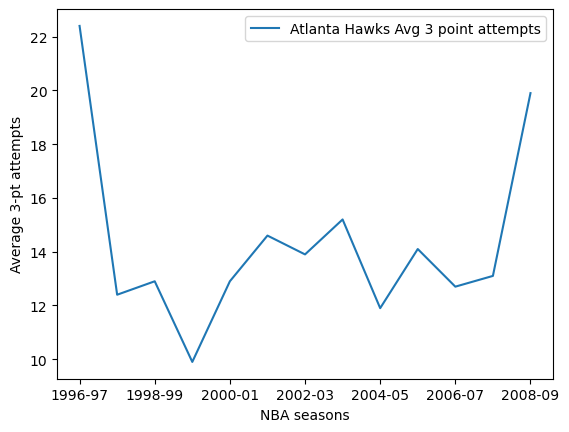

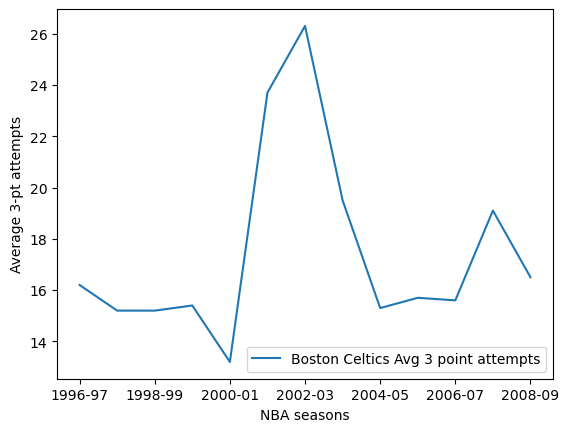

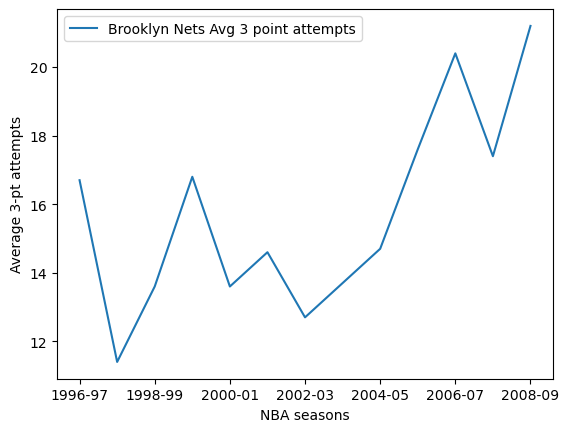

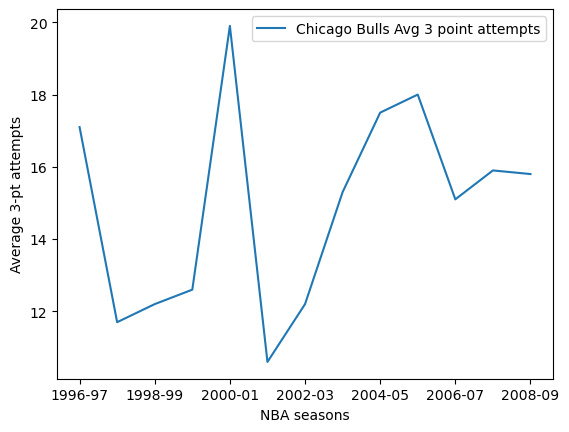

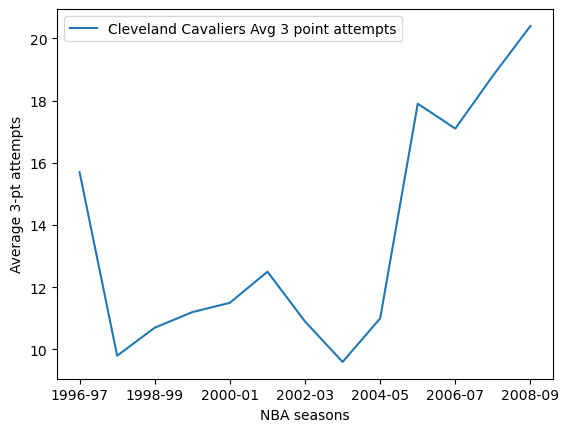

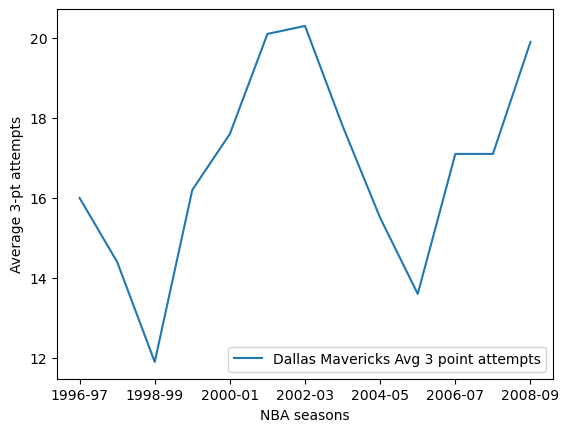

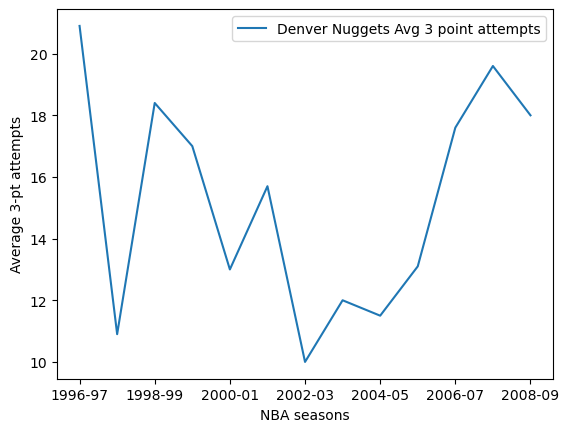

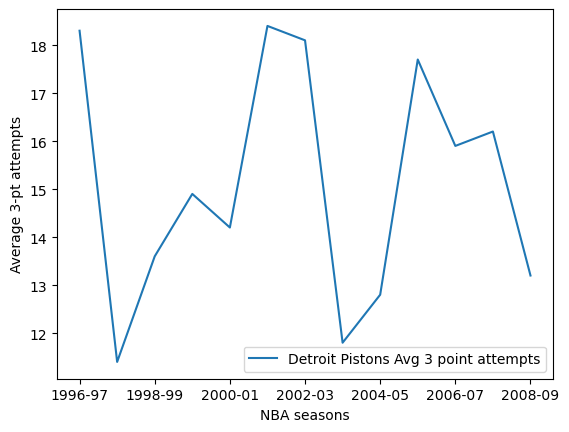

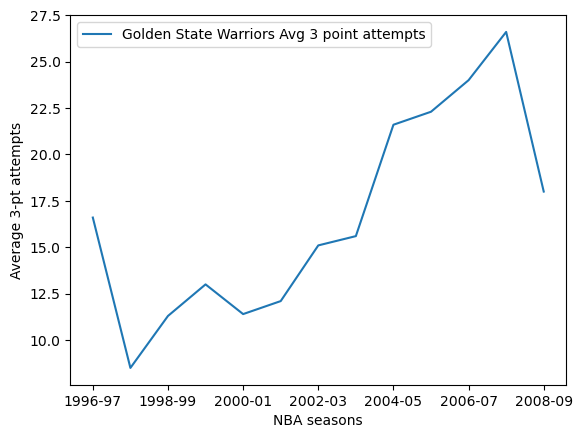

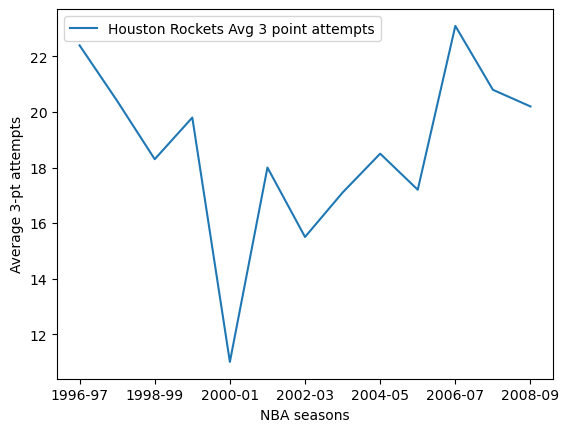

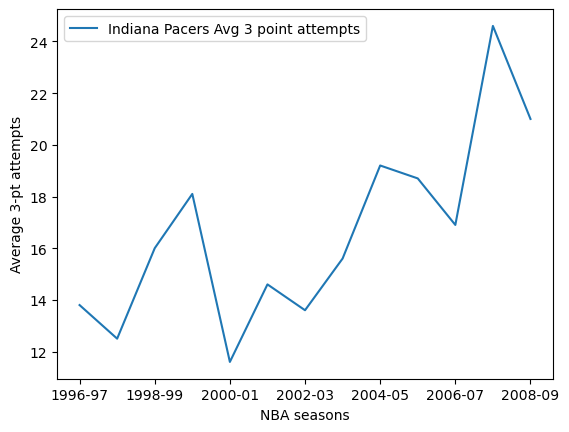

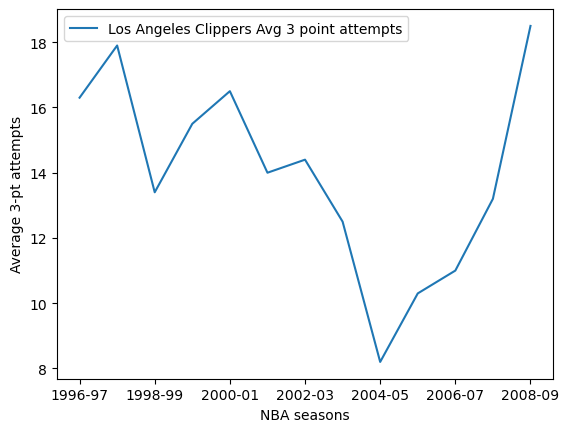

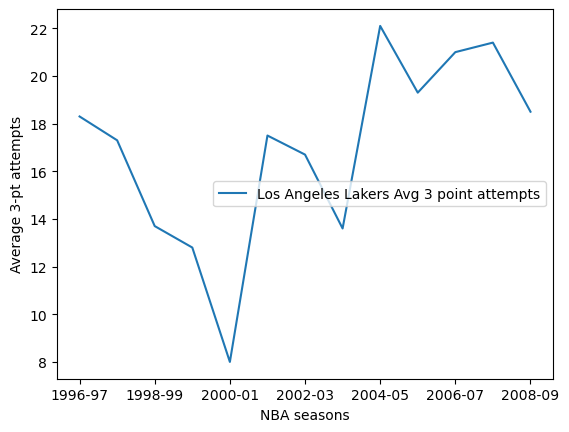

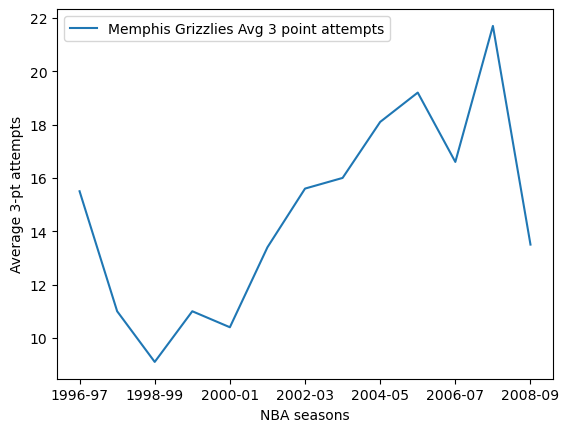

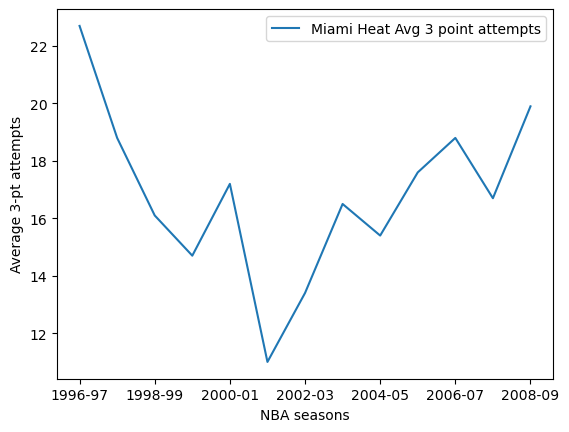

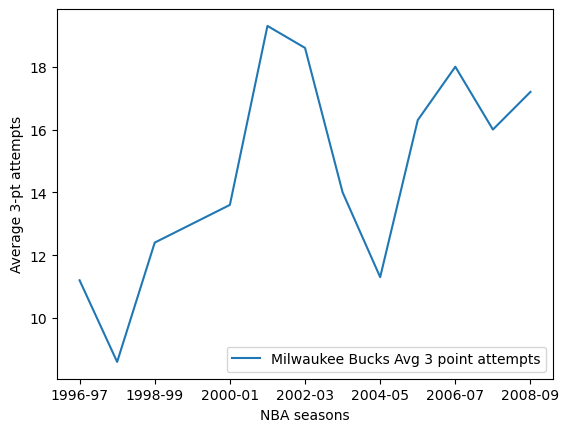

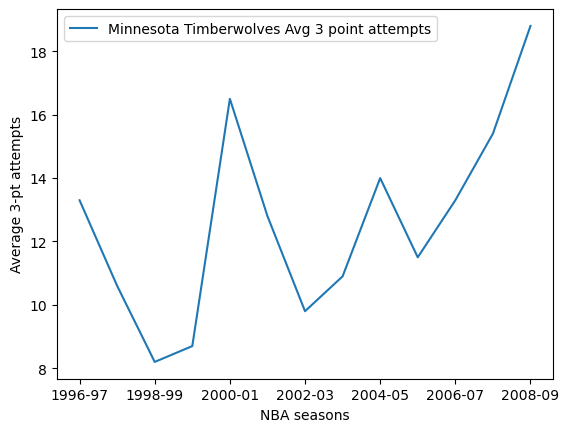

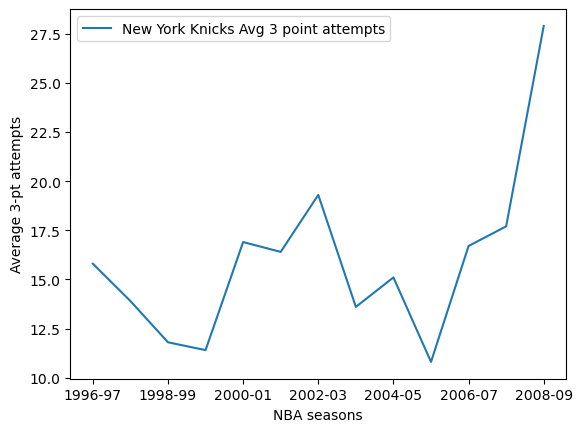

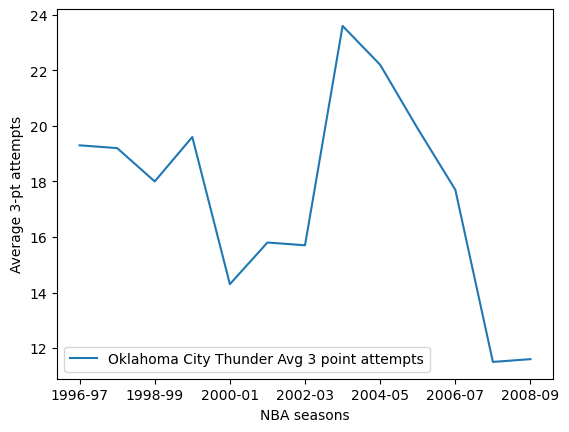

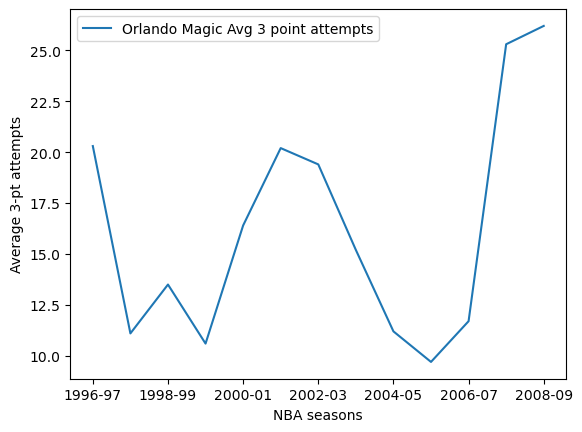

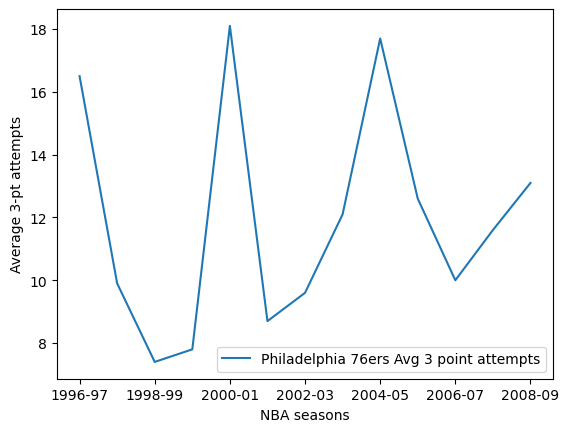

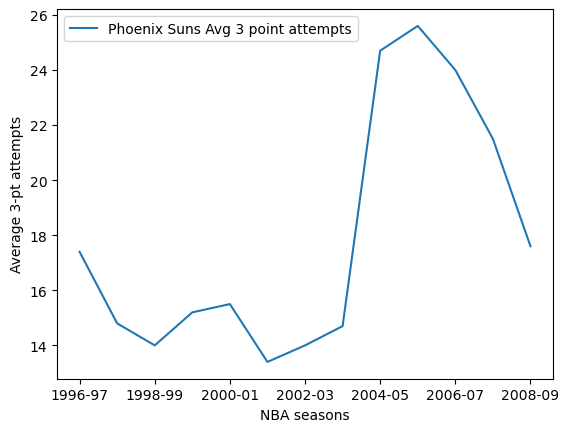

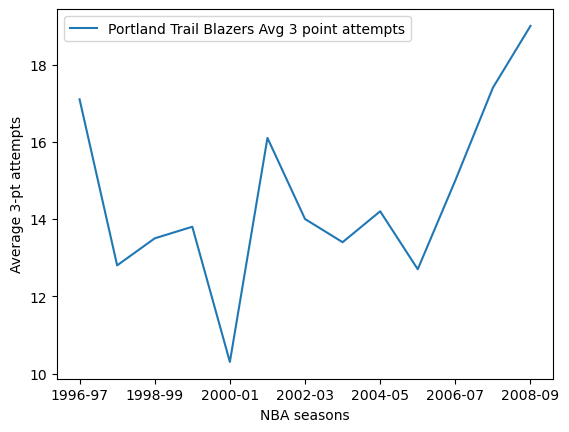

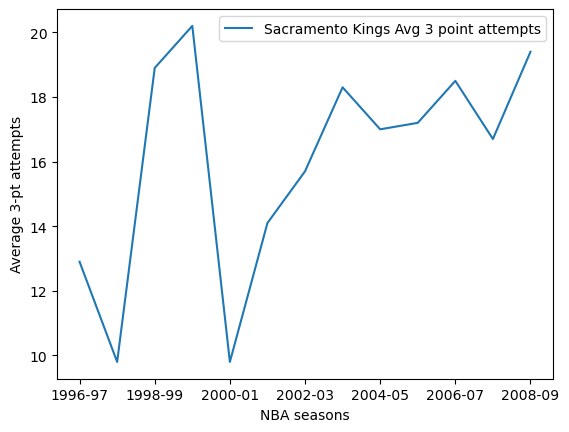

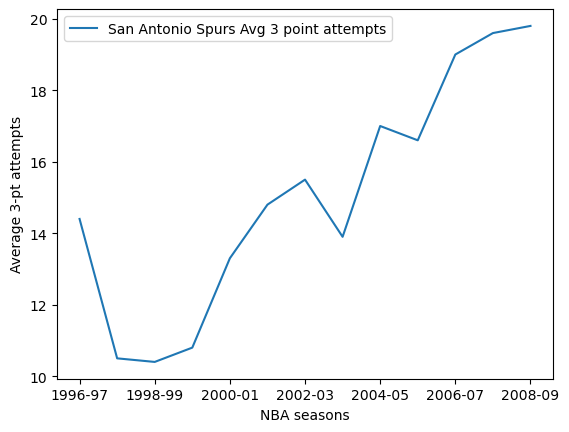

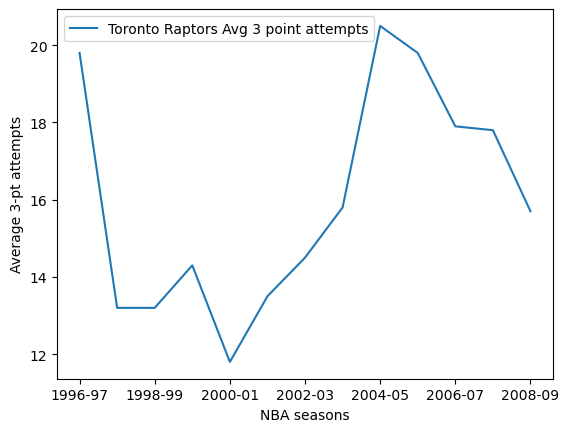

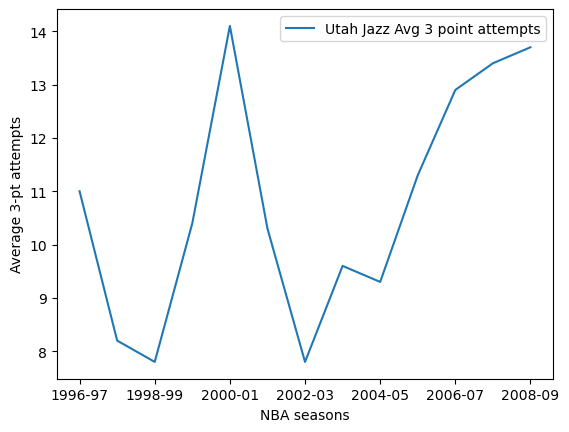

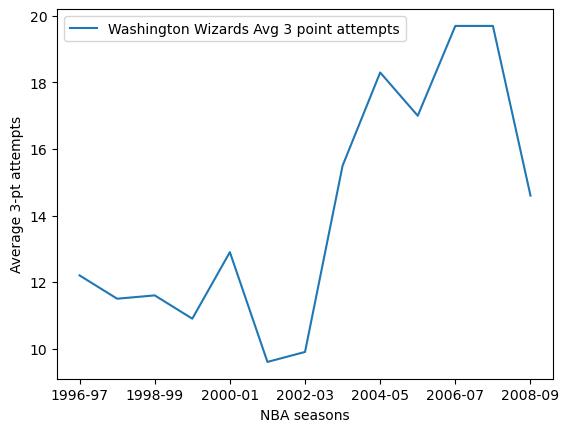

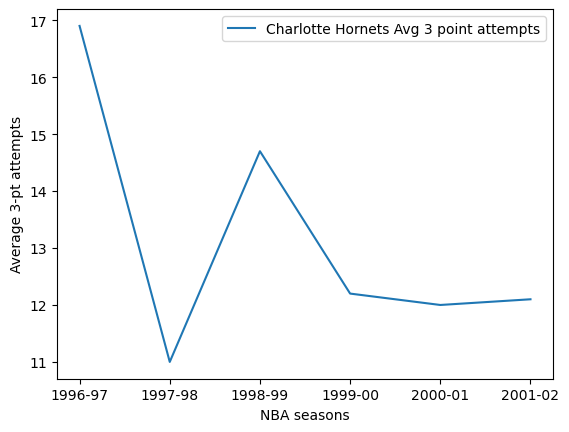

In [24]:
first_years = ['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09']
hawks_3pta = []
for i in range(0,13):
    hawks_3pta.append(df.iloc[2,2+4*i])
hawks_3pta
hawks_dict = pd.DataFrame({'NBA seasons' : first_years, 'Atlanta Hawks Avg 3 point attempts': hawks_3pta})
hawks_dict_plt = hawks_dict.plot( 'NBA seasons' , 'Atlanta Hawks Avg 3 point attempts' )
hawks_dict_plt.set_ylabel("Average 3-pt attempts")
celtics_3pta = []
for i in range(0,13):
    celtics_3pta.append(df.iloc[3,2+4*i])
celtics_dict = pd.DataFrame({'NBA seasons' : first_years, 'Boston Celtics Avg 3 point attempts': celtics_3pta})
celtics_dict_plt = celtics_dict.plot( 'NBA seasons' , 'Boston Celtics Avg 3 point attempts' )
celtics_dict_plt.set_ylabel("Average 3-pt attempts")
nets_3pta = []
for i in range(0,13):
    nets_3pta.append(df.iloc[4,2+4*i])
nets_dict = pd.DataFrame({'NBA seasons' : first_years, 'Brooklyn Nets Avg 3 point attempts': nets_3pta})
nets_dict_plt = nets_dict.plot( 'NBA seasons' , 'Brooklyn Nets Avg 3 point attempts' )
nets_dict_plt.set_ylabel("Average 3-pt attempts")
bulls_3pta = []
for i in range(0,13):
    bulls_3pta.append(df.iloc[5,2+4*i])
bulls_dict = pd.DataFrame({'NBA seasons' : first_years, 'Chicago Bulls Avg 3 point attempts': bulls_3pta})
bulls_dict_plt = bulls_dict.plot( 'NBA seasons' , 'Chicago Bulls Avg 3 point attempts' )
bulls_dict_plt.set_ylabel("Average 3-pt attempts")

cavs_3pta = []
for i in range(0,13):
    cavs_3pta.append(df.iloc[6,2+4*i])
cavs_dict = pd.DataFrame({'NBA seasons' : first_years, 'Cleveland Cavaliers Avg 3 point attempts': cavs_3pta})
cavs_dict_plt = cavs_dict.plot( 'NBA seasons' , 'Cleveland Cavaliers Avg 3 point attempts' )
cavs_dict_plt.set_ylabel("Average 3-pt attempts")

mavs_3pta = []
for i in range(0,13):
    mavs_3pta.append(df.iloc[7,2+4*i])
mavs_dict = pd.DataFrame({'NBA seasons' : first_years, 'Dallas Mavericks Avg 3 point attempts': mavs_3pta})
mavs_dict_plt = mavs_dict.plot( 'NBA seasons' , 'Dallas Mavericks Avg 3 point attempts' )
mavs_dict_plt.set_ylabel("Average 3-pt attempts")

nuggets_3pta = []
for i in range(0,13):
    nuggets_3pta.append(df.iloc[8,2+4*i])
nuggets_dict = pd.DataFrame({'NBA seasons' : first_years, 'Denver Nuggets Avg 3 point attempts': nuggets_3pta})
nuggets_dict_plt = nuggets_dict.plot( 'NBA seasons' , 'Denver Nuggets Avg 3 point attempts' )
nuggets_dict_plt.set_ylabel("Average 3-pt attempts")

pistons_3pta = []
for i in range(0,13):
    pistons_3pta.append(df.iloc[9,2+4*i])
pistons_dict = pd.DataFrame({'NBA seasons' : first_years, 'Detroit Pistons Avg 3 point attempts': pistons_3pta})
pistons_dict_plt = pistons_dict.plot( 'NBA seasons' , 'Detroit Pistons Avg 3 point attempts' )
pistons_dict_plt.set_ylabel("Average 3-pt attempts")

warriors_3pta = []
for i in range(0,13):
    warriors_3pta.append(df.iloc[10,2+4*i])
warriors_dict = pd.DataFrame({'NBA seasons' : first_years, 'Golden State Warriors Avg 3 point attempts': warriors_3pta})
warriors_dict_plt = warriors_dict.plot( 'NBA seasons' , 'Golden State Warriors Avg 3 point attempts' )
warriors_dict_plt.set_ylabel("Average 3-pt attempts")

rockets_3pta = []
for i in range(0,13):
    rockets_3pta.append(df.iloc[11,2+4*i])
rockets_dict = pd.DataFrame({'NBA seasons' : first_years, 'Houston Rockets Avg 3 point attempts': rockets_3pta})
rockets_dict_plt = rockets_dict.plot( 'NBA seasons' , 'Houston Rockets Avg 3 point attempts' )
rockets_dict_plt.set_ylabel("Average 3-pt attempts")

pacers_3pta = []
for i in range(0,13):
    pacers_3pta.append(df.iloc[12,2+4*i])
pacers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Indiana Pacers Avg 3 point attempts': pacers_3pta})
pacers_dict_plt = pacers_dict.plot( 'NBA seasons' , 'Indiana Pacers Avg 3 point attempts' )
pacers_dict_plt.set_ylabel("Average 3-pt attempts")

clippers_3pta = []
for i in range(0,13):
    clippers_3pta.append(df.iloc[13,2+4*i])
clippers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Los Angeles Clippers Avg 3 point attempts': clippers_3pta})
clippers_dict_plt = clippers_dict.plot( 'NBA seasons' , 'Los Angeles Clippers Avg 3 point attempts' )
clippers_dict_plt.set_ylabel("Average 3-pt attempts")

lakers_3pta = []
for i in range(0,13):
    lakers_3pta.append(df.iloc[14,2+4*i])
lakers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Los Angeles Lakers Avg 3 point attempts': lakers_3pta})
lakers_dict_plt = lakers_dict.plot( 'NBA seasons' , 'Los Angeles Lakers Avg 3 point attempts' )
lakers_dict_plt.set_ylabel("Average 3-pt attempts")

grizzlies_3pta = []
for i in range(0,13):
    grizzlies_3pta.append(df.iloc[15,2+4*i])
grizzlies_dict = pd.DataFrame({'NBA seasons' : first_years, 'Memphis Grizzlies Avg 3 point attempts': grizzlies_3pta})
grizzlies_dict_plt = grizzlies_dict.plot( 'NBA seasons' , 'Memphis Grizzlies Avg 3 point attempts' )
grizzlies_dict_plt.set_ylabel("Average 3-pt attempts")

heat_3pta = []
for i in range(0,13):
    heat_3pta.append(df.iloc[16,2+4*i])
heat_dict = pd.DataFrame({'NBA seasons' : first_years, 'Miami Heat Avg 3 point attempts': heat_3pta})
heat_dict_plt = heat_dict.plot( 'NBA seasons' , 'Miami Heat Avg 3 point attempts' )
heat_dict_plt.set_ylabel("Average 3-pt attempts")

bucks_3pta = []
for i in range(0,13):
    bucks_3pta.append(df.iloc[17,2+4*i])
bucks_dict = pd.DataFrame({'NBA seasons' : first_years, 'Milwaukee Bucks Avg 3 point attempts': bucks_3pta})
bucks_dict_plt = bucks_dict.plot( 'NBA seasons' , 'Milwaukee Bucks Avg 3 point attempts' )
bucks_dict_plt.set_ylabel("Average 3-pt attempts")

wolves_3pta = []
for i in range(0,13):
    wolves_3pta.append(df.iloc[18,2+4*i])
wolves_dict = pd.DataFrame({'NBA seasons' : first_years, 'Minnesota Timberwolves Avg 3 point attempts': wolves_3pta})
wolves_dict_plt = wolves_dict.plot( 'NBA seasons' , 'Minnesota Timberwolves Avg 3 point attempts' )
wolves_dict_plt.set_ylabel("Average 3-pt attempts")

knicks_3pta = []
for i in range(0,13):
    knicks_3pta.append(df.iloc[19,2+4*i])
knicks_dict = pd.DataFrame({'NBA seasons' : first_years, 'New York Knicks Avg 3 point attempts': knicks_3pta})
knicks_dict_plt = knicks_dict.plot( 'NBA seasons' , 'New York Knicks Avg 3 point attempts' )
knicks_dict_plt.set_ylabel("Average 3-pt attempts")

thunder_3pta = []
for i in range(0,13):
    thunder_3pta.append(df.iloc[20,2+4*i])
thunder_dict = pd.DataFrame({'NBA seasons' : first_years, 'Oklahoma City Thunder Avg 3 point attempts': thunder_3pta})
thunder_dict_plt = thunder_dict.plot( 'NBA seasons' , 'Oklahoma City Thunder Avg 3 point attempts' )
thunder_dict_plt.set_ylabel("Average 3-pt attempts")

magic_3pta = []
for i in range(0,13):
    magic_3pta.append(df.iloc[21,2+4*i])
magic_dict = pd.DataFrame({'NBA seasons' : first_years, 'Orlando Magic Avg 3 point attempts': magic_3pta})
magic_dict_plt = magic_dict.plot( 'NBA seasons' , 'Orlando Magic Avg 3 point attempts' )
magic_dict_plt.set_ylabel("Average 3-pt attempts")

sixers_3pta = []
for i in range(0,13):
    sixers_3pta.append(df.iloc[22,2+4*i])
sixers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Philadelphia 76ers Avg 3 point attempts': sixers_3pta})
sixers_dict_plt = sixers_dict.plot( 'NBA seasons' , 'Philadelphia 76ers Avg 3 point attempts' )
sixers_dict_plt.set_ylabel("Average 3-pt attempts")

suns_3pta = []
for i in range(0,13):
    suns_3pta.append(df.iloc[23,2+4*i])
suns_dict = pd.DataFrame({'NBA seasons' : first_years, 'Phoenix Suns Avg 3 point attempts': suns_3pta})
suns_dict_plt = suns_dict.plot( 'NBA seasons' , 'Phoenix Suns Avg 3 point attempts' )
suns_dict_plt.set_ylabel("Average 3-pt attempts")

blazers_3pta = []
for i in range(0,13):
    blazers_3pta.append(df.iloc[24,2+4*i])
blazers_dict = pd.DataFrame({'NBA seasons' : first_years, 'Portland Trail Blazers Avg 3 point attempts': blazers_3pta})
blazers_dict_plt = blazers_dict.plot( 'NBA seasons' , 'Portland Trail Blazers Avg 3 point attempts' )
blazers_dict_plt.set_ylabel("Average 3-pt attempts")

kings_3pta = []
for i in range(0,13):
    kings_3pta.append(df.iloc[25,2+4*i])
kings_dict = pd.DataFrame({'NBA seasons' : first_years, 'Sacramento Kings Avg 3 point attempts': kings_3pta})
kings_dict_plt = kings_dict.plot( 'NBA seasons' , 'Sacramento Kings Avg 3 point attempts' )
kings_dict_plt.set_ylabel("Average 3-pt attempts")

spurs_3pta = []
for i in range(0,13):
    spurs_3pta.append(df.iloc[26,2+4*i])
spurs_dict = pd.DataFrame({'NBA seasons' : first_years, 'San Antonio Spurs Avg 3 point attempts': spurs_3pta})
spurs_dict_plt = spurs_dict.plot( 'NBA seasons' , 'San Antonio Spurs Avg 3 point attempts' )
spurs_dict_plt.set_ylabel("Average 3-pt attempts")

raptors_3pta = []
for i in range(0,13):
    raptors_3pta.append(df.iloc[27,2+4*i])
raptors_dict = pd.DataFrame({'NBA seasons' : first_years, 'Toronto Raptors Avg 3 point attempts': raptors_3pta})
raptors_dict_plt = raptors_dict.plot( 'NBA seasons' , 'Toronto Raptors Avg 3 point attempts' )
raptors_dict_plt.set_ylabel("Average 3-pt attempts")

jazz_3pta = []
for i in range(0,13):
    jazz_3pta.append(df.iloc[28,2+4*i])
jazz_dict = pd.DataFrame({'NBA seasons' : first_years, 'Utah Jazz Avg 3 point attempts': jazz_3pta})
jazz_dict_plt = jazz_dict.plot( 'NBA seasons' , 'Utah Jazz Avg 3 point attempts' )
jazz_dict_plt.set_ylabel("Average 3-pt attempts")

wizards_3pta = []
for i in range(0,13):
    wizards_3pta.append(df.iloc[29,2+4*i])
wizards_dict = pd.DataFrame({'NBA seasons' : first_years, 'Washington Wizards Avg 3 point attempts': wizards_3pta})
wizards_dict_plt = wizards_dict.plot( 'NBA seasons' , 'Washington Wizards Avg 3 point attempts' )
wizards_dict_plt.set_ylabel("Average 3-pt attempts")
hornets_years = ['1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02']
hornets_3pta = []
for i in range(0,6):
    hornets_3pta.append(df.iloc[30,2+4*i])
hornets_dict = pd.DataFrame({'NBA seasons' : hornets_years, 'Charlotte Hornets Avg 3 point attempts': hornets_3pta})
hornets_dict_plt = hornets_dict.plot( 'NBA seasons' , 'Charlotte Hornets Avg 3 point attempts' )
hornets_dict_plt.set_ylabel("Average 3-pt attempts")

It is not exactly clear how we should describe these trends as a whole, but what I think would be accurate to say is that generally speaking, the league as a whole was attempting more and more threes, albeit at a somewhat gradual pace. What was the average number of 3-point attempts the league took from the 1996-97 to the 2008-09 season?

In [25]:
#This is the average number of 3 point attempts the league took as a whole 
#from the 1996-97 to the 2008-09 season.
first_row = pd.DataFrame(df.loc[1])
first_row_list = list(first_row.loc[first_row[1] == '3PA'].index)
first_row_list2 = [x for x in first_row_list if x < 53]
list1 = list(df.iloc[:,first_row_list2].iloc[32,:])
round(np.mean(list1), 2)

15.34

Let's compare that to the average number of 3-point attempts the league took from the 2009-10 to the 2019-20 season.

In [26]:
#This is the average number of 3 point attempts the league took as a whole 
#from the 2009-10 to the 2019-20 season.
first_row_list3 = [x for x in first_row_list if x > 52]
list2 = list(df.iloc[:,first_row_list3].iloc[32,:])
round(np.mean(list2), 2)

24.06

As we can see, NBA teams averaged nearly 9 more 3-point attempts during the second period of seasons than the first! Why did NBA teams decide to shoot a more substantial amount of threes? It may be due to players like Stephen Curry, who with his shooting a high volume of threes on above league average efficiency, showed the league the value of having good 3-point shooters that can shoot a high volume of threes. That being said, Curry did not come out of the gate shooting a high number of threes. Let's take a look at the average number of 3-point attempts Curry took in his first three seasons in the league.

In [27]:
round(stephen_curry_3pt_att.iloc[[0,1,2],0].mean(), 2)

4.73

We see that Curry averaged 4.73 3-point attempts in his first three seasons. But now take a look at this!

In [28]:
pd.DataFrame(stephen_curry_3pt_att.iloc[4,:]).T

,Avg # 3pt attempts per game
2013-2014,7.8


We see that Curry took it to another gear in the 2013-2014 in regards to his shooting. In fact, let's take a look at his average number of 3-point attempts from 2013-14 to 2019-2020. 

In [29]:
round(stephen_curry_3pt_att.iloc[range(3,11),0].mean(), 2)

9.45

Within these two time spans, Curry doubled the number of 3-point attempts! Let's now compare the average number of 3-point attempts the league took as a whole from 1996-97 to 2012-2013 and from 2013-2014 to 2019-2020.

In [30]:
#This is the average number of 3-point attempts the league took as a whole 
#from 1996-1997 to 2012-2013
first_row_list2 = [x for x in first_row_list if x<69]
first_row_list2
round(df.iloc[32,first_row_list2].mean(),2)

16.11

In [31]:
#This is the average number of 3-point attempts the league took as a whole 
#from 2012-2013 to 2019-2020
first_row_list3 = [x for x in first_row_list if x>69]
first_row_list3
round(df.iloc[32,first_row_list3].mean(),2)

27.16

The least we may conclude from this investigation is that there is a positive relationship between Stephen Curry's average number of 3-point attempts (combined with his efficient 3-point shooting) and the number of 3-point attempts the league took as a whole within the time span that Curry has been in the league.